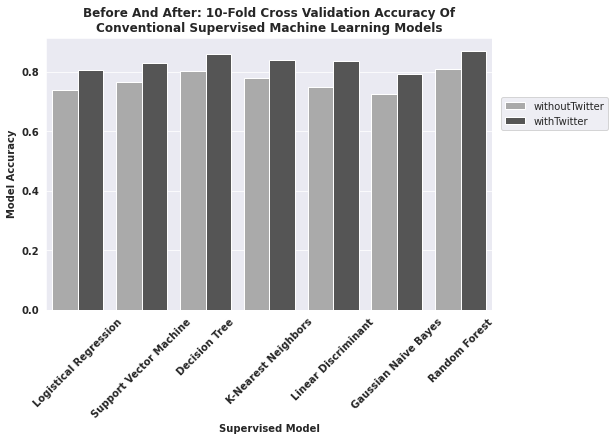

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
d = {
    'algorithm': ['Logistical Regression', 'Logistical Regression', 'Support Vector Machine', 'Support Vector Machine', 
             'Decision Tree', 'Decision Tree', 'K-Nearest Neighbors', 'K-Nearest Neighbors', 'Linear Discriminant', 
             'Linear Discriminant', 'Gaussian Naive Bayes', 'Gaussian Naive Bayes', 'Random Forest', 'Random Forest'], 
     'usage':['withoutTwitter', 'withTwitter', 'withoutTwitter', 'withTwitter', 'withoutTwitter', 'withTwitter', 
             'withoutTwitter', 'withTwitter', 'withoutTwitter', 'withTwitter', 'withoutTwitter', 'withTwitter', 
             'withoutTwitter', 'withTwitter'
             ], 
     'accuracy': [0.7382, 0.8049, 0.7659, 0.8304, 0.8039, 0.8603, 0.7801, 0.8409, 0.7486, 0.8352, 0.7253, 0.7934, 0.8109, 0.8702]}
df = pd.DataFrame(data=d)

plt.rcParams["figure.figsize"] = (8,5)
sns.set_style("darkgrid")
sns.barplot(x="algorithm", y="accuracy", hue="usage", data=df, palette = 'gist_yarg')
plt.legend(bbox_to_anchor=(1.27, 0.8))
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.title("Before And After: 10-Fold Cross Validation Accuracy Of\nConventional Supervised Machine Learning Models",fontweight='bold')
plt.xlabel("Supervised Model",fontweight='bold')
plt.ylabel("Model Accuracy",fontweight='bold')
pass;

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#read in the data
ny = pd.read_csv('./new_york.csv')

In [ ]:
ny

indicator     group     state  \
0                        Symptoms of Depressive Disorder  By State  New York   
1                        Symptoms of Depressive Disorder  By State  New York   
2                        Symptoms of Depressive Disorder  By State  New York   
3                        Symptoms of Depressive Disorder  By State  New York   
4                        Symptoms of Depressive Disorder  By State  New York   
...                                                  ...       ...       ...   
35779  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35780  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35781  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35782  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35783  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   

       subgroup              phase  time_period time_period_label  \
0      New York                  1          1.0    Apr 23 - May 5   
1      New York                  1          1.0    Apr 23 - May 5   
2      New York                  1          1.0    Apr 23 - May 5   
3      New York                  1          1.0    Apr 23 - May 5   
4      New York                  1          1.0    Apr 23 - May 5   
...         ...                ...          ...               ...   
35779  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35780  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35781  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35782  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35783  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   

        time_period_start_date     time_period_end_date  value  ...  \
0      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
1      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
2      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
3      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
4      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
...                        ...                      ...    ...  ...   
35779  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35780  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35781  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35782  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35783  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   

       CASE_RATE  HOSPITALIZED_RATE DEATH_RATE        date    CASE_COUNT  \
0         171.46              13.55       0.23  2020-04-23   90629.21686   
1        1554.45             153.69      12.88  2020-04-23   90629.21686   
2        2529.03             630.34     113.37  2020-04-23   90629.21686   
3        2552.64            1192.50     364.17  2020-04-23   90629.21686   
4        2976.74            1830.07     909.18  2020-04-23   90629.21686   
...          ...                ...        ...         ...           ...   
35779   20207.72            1160.60      67.68  2021-02-01  224684.00000   
35780   15941.19            2540.10     476.51  2021-02-01  161559.00000   
35781    7067.11            2418.35     756.82  2021-02-01   50798.00000   
35782    7477.43            3995.12    1989.81  2021-02-01   41994.00000   
35783    6302.86             958.30     266.66  2021-02-01  525458.00000   

       HOSPITALIZED_COUNT   DEATH_COUNT    counts sentiment__negative  \
0            19942.175032   6754.809134  295066.0               500.0   
1            19942.175032   6754.809134  295066.0               500.0   
2            19942.175032   6754.809134  295066.0               500.0   
3            19942.175032   6754.809134  295066.0               500.0   
4            19942.175032   6754.809134  295066.0               500.0   
...                   ...           ...       ...    

In [ ]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "0", "Symptoms of Depressive Disorder": "1", "Symptoms of Anxiety Disorder or Depressive Disorder": "2"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)


In [ ]:
data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']
del data_to_use['counts']
del data_to_use['phase']
del data_to_use['time_period_start_date']
del data_to_use['time_period_end_date']
del data_to_use['lowci']
del data_to_use['highci']
del data_to_use['age']


ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   indicator            35784 non-null  object 
 1   time_period          35784 non-null  float64
 2   value                35784 non-null  float64
 3   CASE_RATE            35784 non-null  float64
 4   HOSPITALIZED_RATE    35784 non-null  float64
 5   DEATH_RATE           33957 non-null  float64
 6   date                 35784 non-null  object 
 7   CASE_COUNT           35784 non-null  float64
 8   HOSPITALIZED_COUNT   35784 non-null  float64
 9   DEATH_COUNT          35784 non-null  float64
 10  sentiment__negative  35784 non-null  float64
 11  sentiment__positive  35784 non-null  float64
dtypes: float64(10), object(2)
memory usage: 3.3+ MB


In [ ]:
data_to_use

indicator  time_period  value  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  \
0             1          1.0   28.7     171.46              13.55        0.23   
1             1          1.0   28.7    1554.45             153.69       12.88   
2             1          1.0   28.7    2529.03             630.34      113.37   
3             1          1.0   28.7    2552.64            1192.50      364.17   
4             1          1.0   28.7    2976.74            1830.07      909.18   
...         ...          ...    ...        ...                ...         ...   
35779         2         23.0   35.8   20207.72            1160.60       67.68   
35780         2         23.0   35.8   15941.19            2540.10      476.51   
35781         2         23.0   35.8    7067.11            2418.35      756.82   
35782         2         23.0   35.8    7477.43            3995.12     1989.81   
35783         2         23.0   35.8    6302.86             958.30      266.66   

             date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  \
0      2020-04-23   90629.21686        19942.175032   6754.809134   
1      2020-04-23   90629.21686        19942.175032   6754.809134   
2      2020-04-23   90629.21686        19942.175032   6754.809134   
3      2020-04-23   90629.21686        19942.175032   6754.809134   
4      2020-04-23   90629.21686        19942.175032   6754.809134   
...           ...           ...                 ...           ...   
35779  2021-02-01  224684.00000        13326.000000    794.000000   
35780  2021-02-01  161559.00000        25652.000000   4800.000000   
35781  2021-02-01   50798.00000        17383.000000   5440.000000   
35782  2021-02-01   41994.00000        22437.000000  11175.000000   
35783  2021-02-01  525458.00000        79892.000000  22231.000000   

       sentiment__negative  sentiment__positive  
0                    500.0                 50.0  
1                    500.0                 50.0  
2                    500.0                 50.0  
3                    500.0                 50.0  
4                    500.0                 50.0  
...                    ...                  ...  
35779                501.0                 49.0  
35780                501.0                 49.0  
35781                501.0                 49.0  
35782                501.0                 49.0  
35783                501.0                 49.0  

[35784 rows x 12 columns]

In [ ]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
ny.isna().sum()

indicator              0
time_period            0
value                  0
CASE_RATE              0
HOSPITALIZED_RATE      0
DEATH_RATE             0
date                   0
CASE_COUNT             0
HOSPITALIZED_COUNT     0
DEATH_COUNT            0
sentiment__negative    0
sentiment__positive    0
dtype: int64

In [ ]:
"""#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)"""

"#Add this cell after API change\nny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3\nny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4\nny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5\nny.rename(columns = {'counts':'twitter_count'}, inplace = True)"

In [ ]:
from sklearn import preprocessing

"""ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)"""
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

"""def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

ny = min_max_normalization(data_to_use)"""
ny

indicator  time_period  value  CASE_RATE  HOSPITALIZED_RATE  \
0            1.0          1.0   28.7     171.46              13.55   
1            1.0          1.0   28.7    1554.45             153.69   
2            1.0          1.0   28.7    2529.03             630.34   
3            1.0          1.0   28.7    2552.64            1192.50   
4            1.0          1.0   28.7    2976.74            1830.07   
...          ...          ...    ...        ...                ...   
35779        2.0         23.0   35.8   20207.72            1160.60   
35780        2.0         23.0   35.8   15941.19            2540.10   
35781        2.0         23.0   35.8    7067.11            2418.35   
35782        2.0         23.0   35.8    7477.43            3995.12   
35783        2.0         23.0   35.8    6302.86             958.30   

       DEATH_RATE        date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  \
0            0.23  2020-04-23   90629.21686        19942.175032   6754.809134   
1           12.88  2020-04-23   90629.21686        19942.175032   6754.809134   
2          113.37  2020-04-23   90629.21686        19942.175032   6754.809134   
3          364.17  2020-04-23   90629.21686        19942.175032   6754.809134   
4          909.18  2020-04-23   90629.21686        19942.175032   6754.809134   
...           ...         ...           ...                 ...           ...   
35779       67.68  2021-02-01  224684.00000        13326.000000    794.000000   
35780      476.51  2021-02-01  161559.00000        25652.000000   4800.000000   
35781      756.82  2021-02-01   50798.00000        17383.000000   5440.000000   
35782     1989.81  2021-02-01   41994.00000        22437.000000  11175.000000   
35783      266.66  2021-02-01  525458.00000        79892.000000  22231.000000   

       sentiment__negative  sentiment__positive  
0                    500.0                 50.0  
1                    500.0                 50.0  
2                    500.0                 50.0  
3                    500.0                 50.0  
4                    500.0                 50.0  
...                    ...                  ...  
35779                501.0                 49.0  
35780                501.0                 49.0  
35781                501.0                 49.0  
35782                501.0                 49.0  
35783                501.0                 49.0  

[35784 rows x 12 columns]

In [ ]:
ny = ny[['time_period', 'value', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','CASE_COUNT','HOSPITALIZED_COUNT','DEATH_COUNT','indicator']]
ny

time_period  value  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  \
0              1.0   28.7     171.46              13.55        0.23   
1              1.0   28.7    1554.45             153.69       12.88   
2              1.0   28.7    2529.03             630.34      113.37   
3              1.0   28.7    2552.64            1192.50      364.17   
4              1.0   28.7    2976.74            1830.07      909.18   
...            ...    ...        ...                ...         ...   
35779         23.0   35.8   20207.72            1160.60       67.68   
35780         23.0   35.8   15941.19            2540.10      476.51   
35781         23.0   35.8    7067.11            2418.35      756.82   
35782         23.0   35.8    7477.43            3995.12     1989.81   
35783         23.0   35.8    6302.86             958.30      266.66   

         CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  indicator  
0       90629.21686        19942.175032   6754.809134        1.0  
1       90629.21686        19942.175032   6754.809134        1.0  
2       90629.21686        19942.175032   6754.809134        1.0  
3       90629.21686        19942.175032   6754.809134        1.0  
4       90629.21686        19942.175032   6754.809134        1.0  
...             ...                 ...           ...        ...  
35779  224684.00000        13326.000000    794.000000        2.0  
35780  161559.00000        25652.000000   4800.000000        2.0  
35781   50798.00000        17383.000000   5440.000000        2.0  
35782   41994.00000        22437.000000  11175.000000        2.0  
35783  525458.00000        79892.000000  22231.000000        2.0  

[35784 rows x 9 columns]

In [ ]:
values = ny.values
 
Y = values[:,-1]
X = values[:,0:8]
Y

array([1., 1., 1., ..., 2., 2., 2.])

In [ ]:
X

array([[1.00000000e+00, 2.87000000e+01, 1.71460000e+02, ...,
        9.06292169e+04, 1.99421750e+04, 6.75480913e+03],
       [1.00000000e+00, 2.87000000e+01, 1.55445000e+03, ...,
        9.06292169e+04, 1.99421750e+04, 6.75480913e+03],
       [1.00000000e+00, 2.87000000e+01, 2.52903000e+03, ...,
        9.06292169e+04, 1.99421750e+04, 6.75480913e+03],
       ...,
       [2.30000000e+01, 3.58000000e+01, 7.06711000e+03, ...,
        5.07980000e+04, 1.73830000e+04, 5.44000000e+03],
       [2.30000000e+01, 3.58000000e+01, 7.47743000e+03, ...,
        4.19940000e+04, 2.24370000e+04, 1.11750000e+04],
       [2.30000000e+01, 3.58000000e+01, 6.30286000e+03, ...,
        5.25458000e+05, 7.98920000e+04, 2.22310000e+04]])

In [ ]:
random_seed = 12

In [ ]:
names = ['Symptoms of Anxiety Disorder', 'Symptoms of Depression Disorder', 'Symptoms of Anxiety or Depression Disorder' ]
feature_names = ['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE', 'DEATH_RATE', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [ ]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier())]

In [ ]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.748227 STD=0.154269
SVM| Mean=0.830381 STD=0.137778
DecTree| Mean=0.860328 STD=0.115053
KNN| Mean=0.830938 STD=0.145684
LinDisc| Mean=0.748590 STD=0.132572
GaussianNB| Mean=0.765278 STD=0.187195
RanForest| Mean=0.860142 STD=0.147396


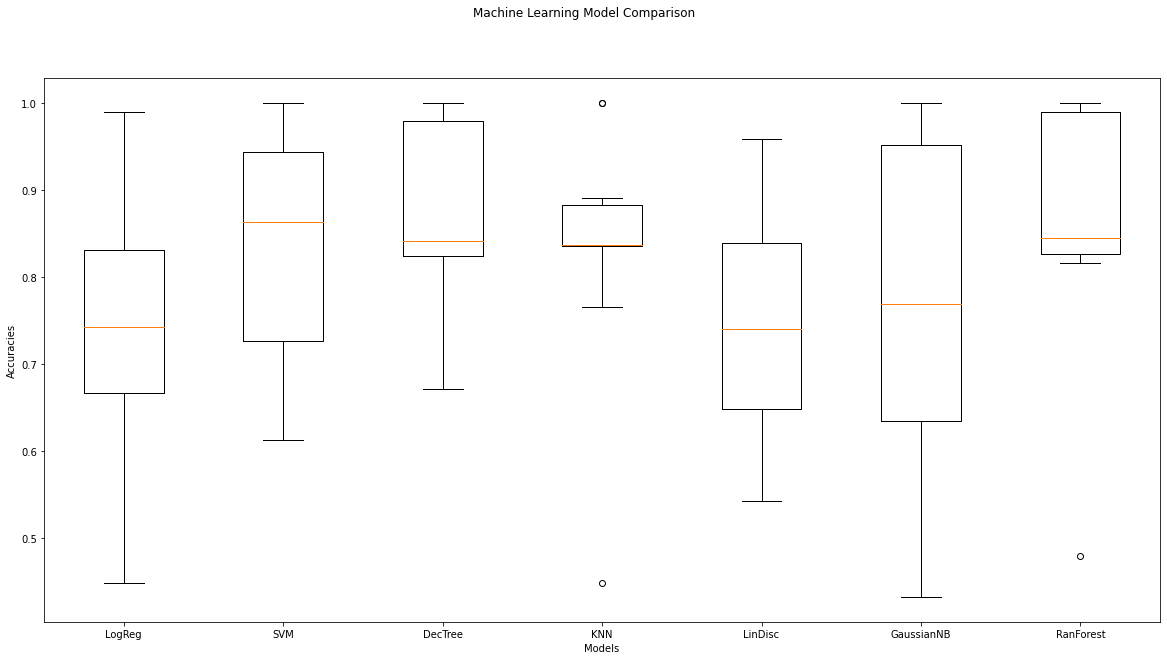

In [ ]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
plt.xlabel('Models')
plt.ylabel('Accuracies')
ax.set_xticklabels(model_names)
plt.show()

In [ ]:
import numpy as nump

uniqueValues, occurCount = nump.unique(Y, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0. 1. 2.]
Occurrence Count :  [11928 11928 11928]


In [ ]:
Y

array([1., 1., 1., ..., 2., 2., 2.])

In [ ]:
import numpy as nump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, nump.newaxis]).toarray()

In [ ]:
X

0         1         2         3         4         5         6  \
0      0.0  0.340102  0.000000  0.000000  0.000000  0.164543  0.245592   
1      0.0  0.340102  0.069024  0.035197  0.006358  0.164543  0.245592   
2      0.0  0.340102  0.117665  0.154911  0.056866  0.164543  0.245592   
3      0.0  0.340102  0.118844  0.296102  0.182923  0.164543  0.245592   
4      0.0  0.340102  0.140010  0.456232  0.456855  0.164543  0.245592   
...    ...       ...       ...       ...       ...       ...       ...   
35779  1.0  0.700508  1.000000  0.288090  0.033902  0.422109  0.162334   
35780  1.0  0.700508  0.787060  0.634561  0.239387  0.300823  0.317444   
35781  1.0  0.700508  0.344159  0.603983  0.380276  0.088013  0.213387   
35782  1.0  0.700508  0.364637  1.000000  1.000000  0.071098  0.276986   
35783  1.0  0.700508  0.306015  0.237281  0.133913  1.000000  1.000000   

              7  
0      0.303533  
1      0.303533  
2      0.303533  
3      0.303533  
4      0.303533  
...         ...  
35779  0.035282  
35780  0.215562  
35781  0.244363  
35782  0.502453  
35783  1.000000  

[35784 rows x 8 columns]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)

In [ ]:
n_features = X.shape[1]
n_classes = Y.shape[1]

In [ ]:
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3580
           1       1.00      1.00      1.00      3571
           2       1.00      1.00      1.00      3585

   micro avg       1.00      1.00      1.00     10736
   macro avg       1.00      1.00      1.00     10736
weighted avg       1.00      1.00      1.00     10736
 samples avg       1.00      1.00      1.00     10736



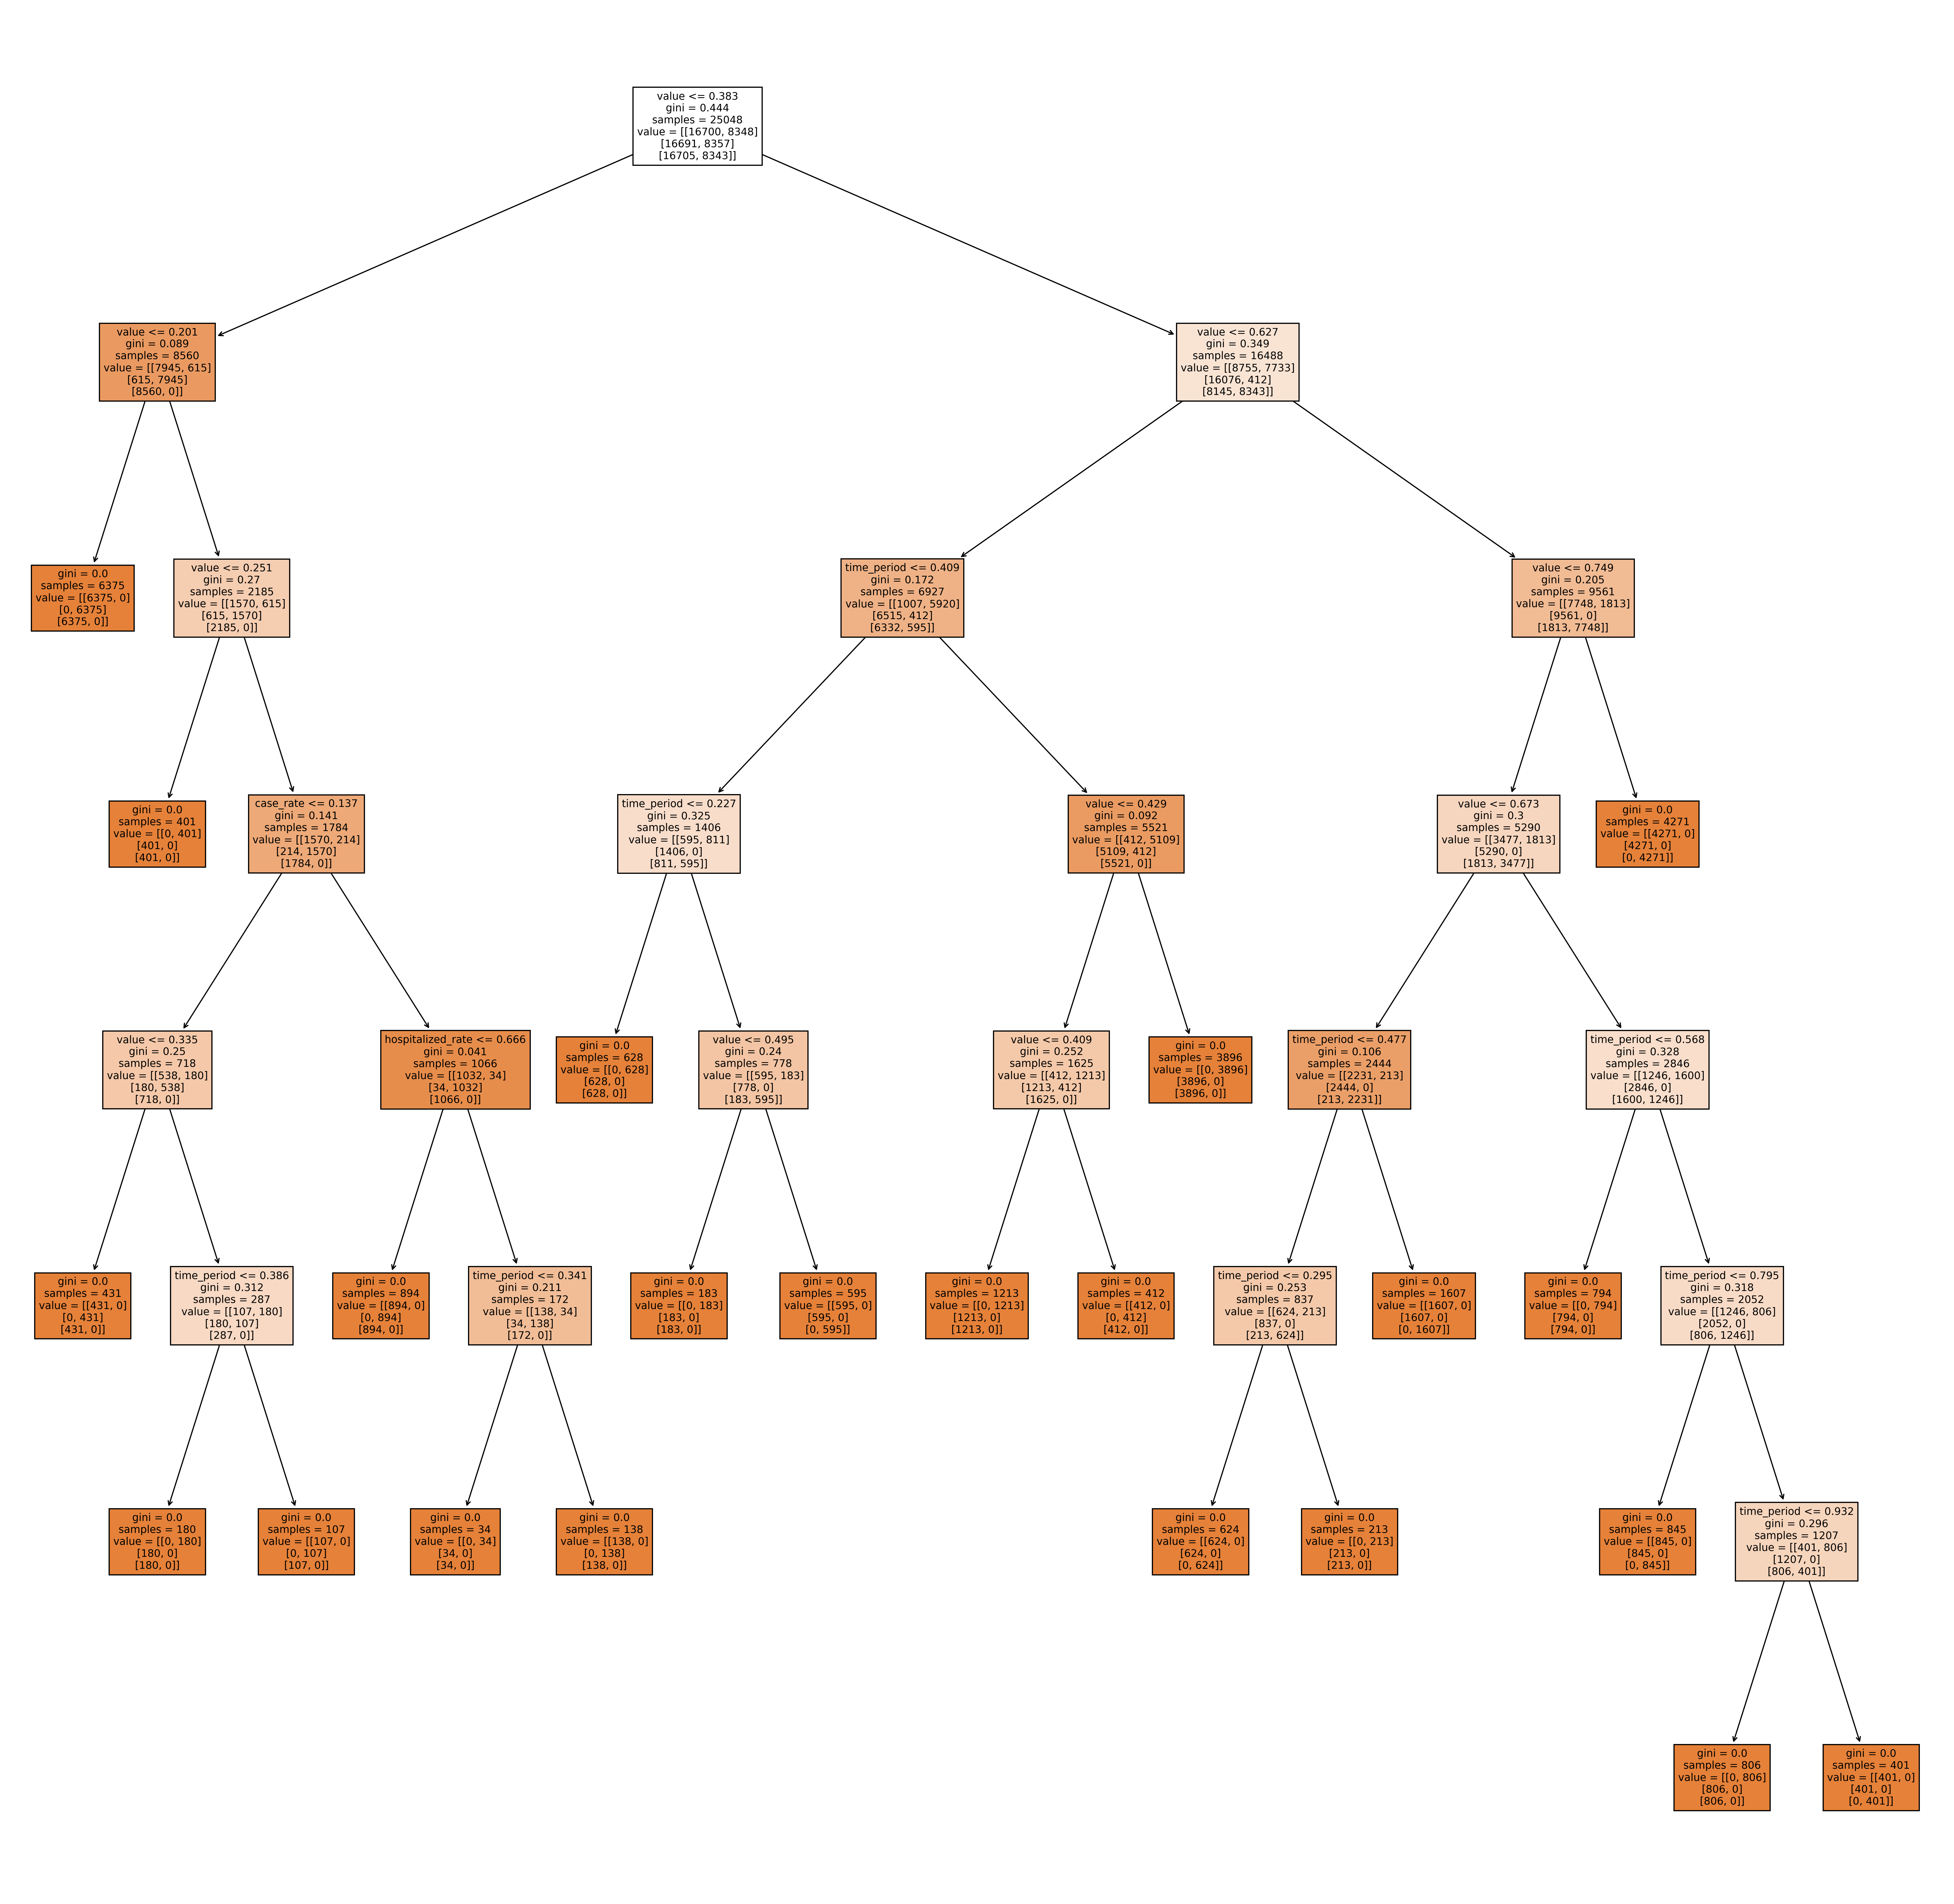

In [ ]:
#!pip install -q graphviz
import graphviz
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

fn=["time_period","value","lowci","highci","age","case_rate","hospitalized_rate","death_rate","case_count","hospitalized_count","death_count","twitter_count"]
cn=['Anxiety', 'Depression', 'Anxiety or Depression']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, y_pred)
score

1.0

In [ ]:
n_features

8

In [ ]:
n_classes

3

In [ ]:
n_features = X.shape[1]
n_classes = Y.shape[1]

In [ ]:
n_features

8

In [ ]:
ny

time_period  value  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  \
0              1.0   28.7     171.46              13.55        0.23   
1              1.0   28.7    1554.45             153.69       12.88   
2              1.0   28.7    2529.03             630.34      113.37   
3              1.0   28.7    2552.64            1192.50      364.17   
4              1.0   28.7    2976.74            1830.07      909.18   
...            ...    ...        ...                ...         ...   
35779         23.0   35.8   20207.72            1160.60       67.68   
35780         23.0   35.8   15941.19            2540.10      476.51   
35781         23.0   35.8    7067.11            2418.35      756.82   
35782         23.0   35.8    7477.43            3995.12     1989.81   
35783         23.0   35.8    6302.86             958.30      266.66   

         CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  indicator  
0       90629.21686        19942.175032   6754.809134        1.0  
1       90629.21686        19942.175032   6754.809134        1.0  
2       90629.21686        19942.175032   6754.809134        1.0  
3       90629.21686        19942.175032   6754.809134        1.0  
4       90629.21686        19942.175032   6754.809134        1.0  
...             ...                 ...           ...        ...  
35779  224684.00000        13326.000000    794.000000        2.0  
35780  161559.00000        25652.000000   4800.000000        2.0  
35781   50798.00000        17383.000000   5440.000000        2.0  
35782   41994.00000        22437.000000  11175.000000        2.0  
35783  525458.00000        79892.000000  22231.000000        2.0  

[35784 rows x 9 columns]

In [ ]:
data2 = pd.read_csv('./new_york.csv')
#data2["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)
#data2["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

del data2['group']
del data2['state']
del data2['subgroup']
del data2['time_period_label']
del data2['confidence_interval']
del data2['quartile_range']
del data2['counts']

data2['DEATH_RATE'].fillna((data2['DEATH_RATE'].mean()), inplace=True)
data2.loc[data2['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
data2.loc[data2['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
data2.loc[data2['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
data2.rename(columns = {'counts':'twitter_count'}, inplace = True)

In [ ]:
from sklearn import preprocessing

#data2["age"] = data2['age'].astype(float)
#data2["indicator"] = data2['indicator'].astype(float)
data2["phase"] = data2['phase'].astype(float)
#data2["indicator"] = data2['indicator'].astype(float)
data2["time_period"] = data2['time_period'].astype(float)


data2

indicator  phase  time_period  \
0                        Symptoms of Depressive Disorder    1.0          1.0   
1                        Symptoms of Depressive Disorder    1.0          1.0   
2                        Symptoms of Depressive Disorder    1.0          1.0   
3                        Symptoms of Depressive Disorder    1.0          1.0   
4                        Symptoms of Depressive Disorder    1.0          1.0   
...                                                  ...    ...          ...   
35779  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35780  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35781  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35782  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35783  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   

        time_period_start_date     time_period_end_date  value  lowci  highci  \
0      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
1      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
2      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
3      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
4      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
...                        ...                      ...    ...    ...     ...   
35779  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35780  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35781  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35782  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35783  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   

                      age  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  \
0           18 - 29 years     171.46              13.55        0.23   
1           18 - 29 years    1554.45             153.69       12.88   
2           18 - 29 years    2529.03             630.34      113.37   
3           18 - 29 years    2552.64            1192.50      364.17   
4           18 - 29 years    2976.74            1830.07      909.18   
...                   ...        ...                ...         ...   
35779  80 years and above   20207.72            1160.60       67.68   
35780  80 years and above   15941.19            2540.10      476.51   
35781  80 years and above    7067.11            2418.35      756.82   
35782  80 years and above    7477.43            3995.12     1989.81   
35783  80 years and above    6302.86             958.30      266.66   

             date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  
0      2020-04-23   90629.21686        19942.175032   6754.809134  
1      2020-04-23   90629.21686        19942.175032   6754.809134  
2      2020-04-23   90629.21686        19942.175032   6754.809134  
3      2020-04-23   90629.21686        19942.175032   6754.809134  
4      2020-04-23   90629.21686        19942.175032   6754.809134  
...           ...           ...                 ...           ...  
35779  2021-02-01  224684.00000        13326.000000    794.000000  
35780  2021-02-01  161559.00000        25652.000000   4800.000000  
35781  2021-02-01   50798.00000        17383.000000   5440.000000  
35782  2021-02-01   41994.00000        22437.000000  11175.000000  
35783  2021-02-01  525458.00000        79892.000000  22231.000000  

[35784 rows x 16 columns]

In [ ]:
data2["indicator"].value_counts()

Symptoms of Depressive Disorder                        11928
Symptoms of Anxiety Disorder                           11928
Symptoms of Anxiety Disorder or Depressive Disorder    11928
Name: indicator, dtype: int64

In [ ]:
#Consider removing cell
"""def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

data2 = min_max_normalization(data2)"""

'def min_max_normalization(df):\n    # copy the dataframe\n    df_norm = df.copy()\n    # apply min-max scaling\n    for column in df_norm.columns:\n        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())\n        \n    return df_norm\n\ndata2 = min_max_normalization(data2)'

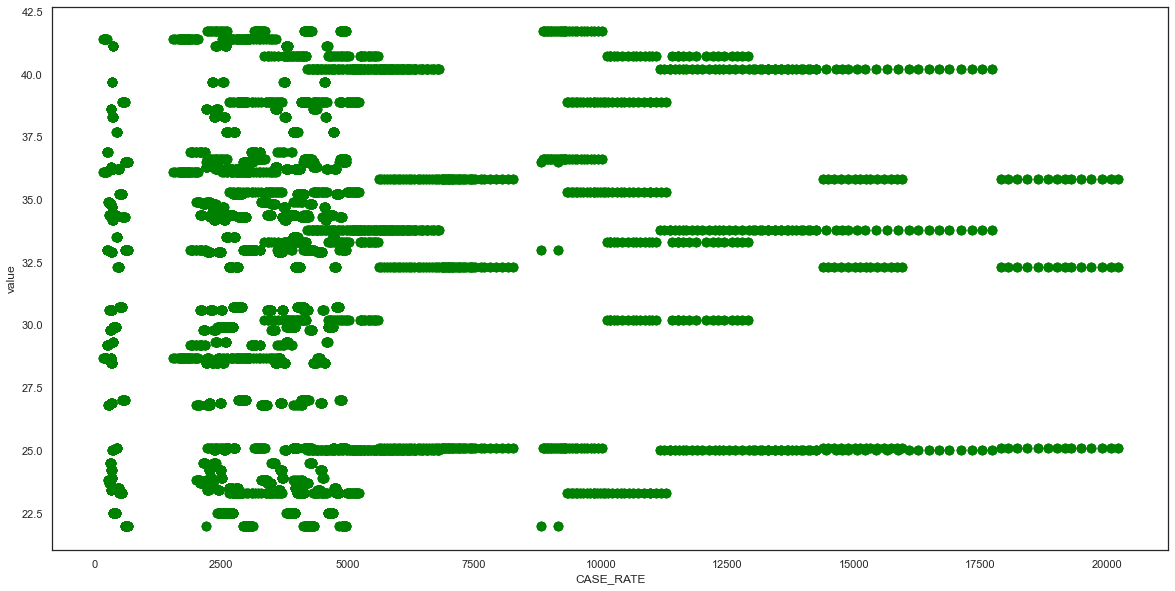

In [ ]:
data2.plot(kind="scatter", x="CASE_RATE", y="value", color="green",s=70)
plt.show()

In [ ]:
import pandas as pd
#!pip install seaborn
# To ignore warnings, use the following code to make the display more attractive.
# Import seaborn and matplotlib.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

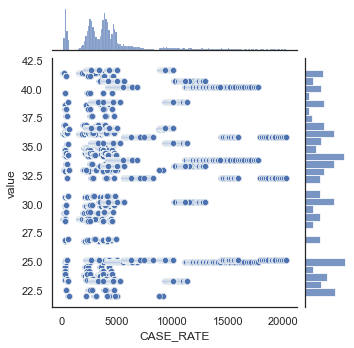

In [ ]:
sns.jointplot(x="CASE_RATE", y="value", data=data2, size=5)
plt.show()

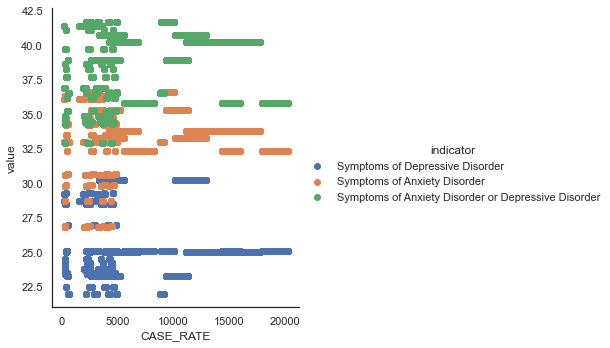

In [ ]:
sns.FacetGrid(data2, hue="indicator", size=5) \
   .map(plt.scatter, "CASE_RATE", "value") \
   .add_legend()
plt.show()

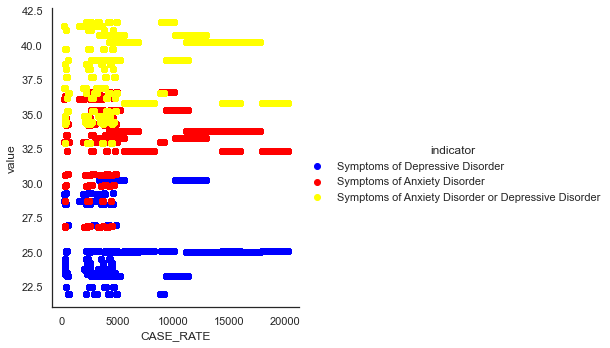

In [ ]:
# Change the colors of the data points in the graph above
# Assign the colors a variable name, and insert hue_kws="variable name" as shown.
KS = {'color': ['blue', 'red', 'yellow', 'Green', 'Orange']}
sns.FacetGrid(data2, hue_kws=KS, hue="indicator", size=5) \
   .map(plt.scatter, "CASE_RATE", "value") \
   .add_legend()
plt.show()

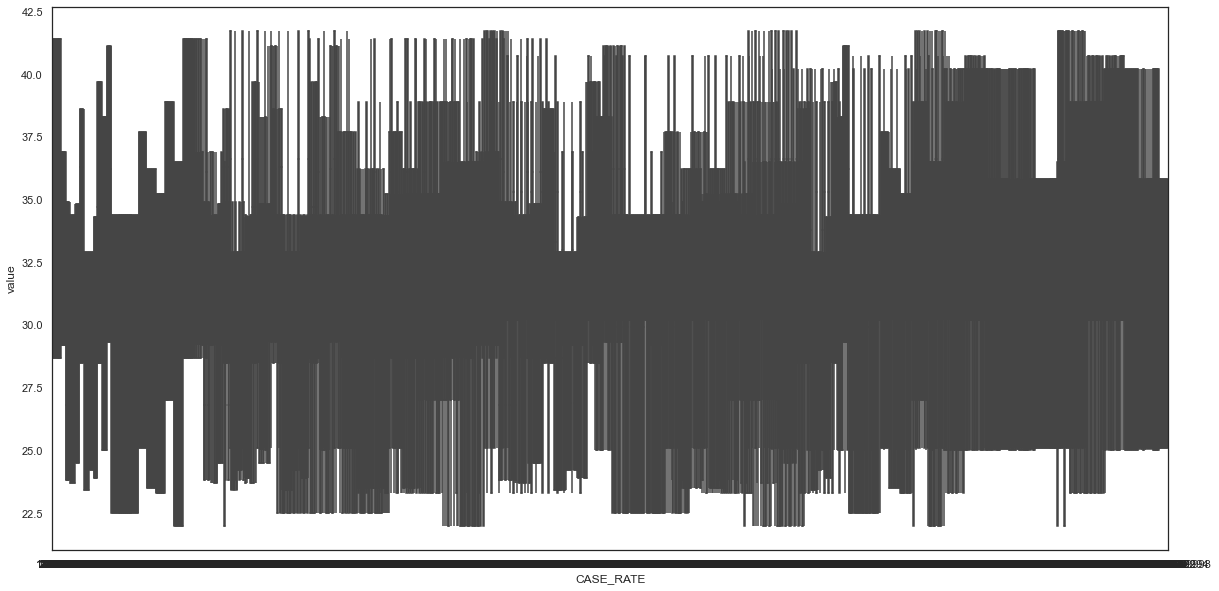

In [ ]:
sns.boxplot(x="CASE_RATE", y="value", data=data2 )
plt.show()

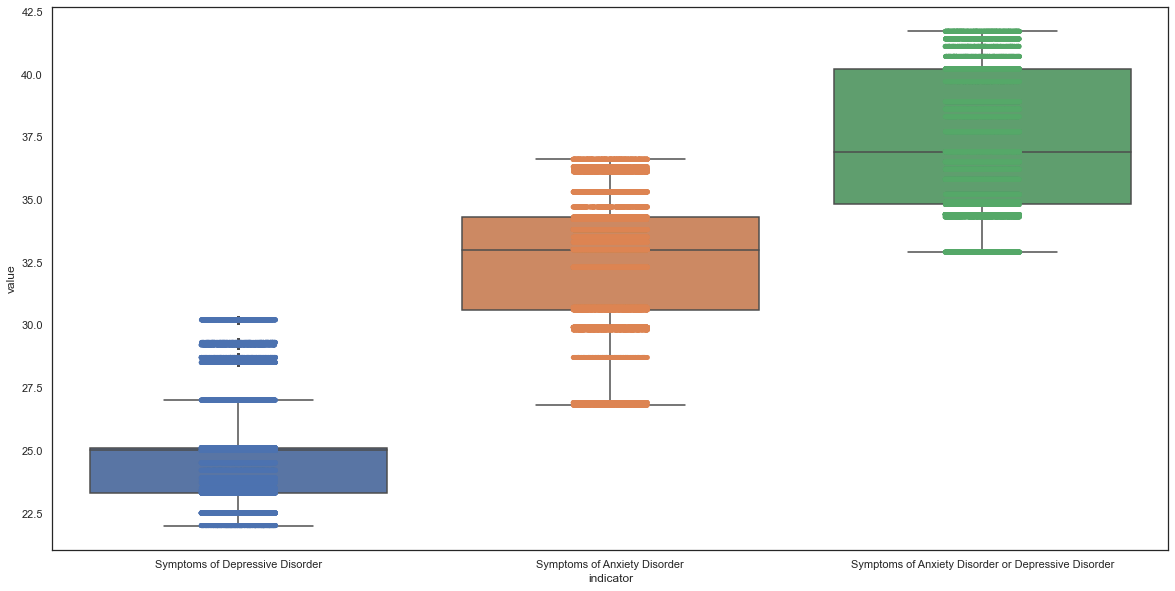

In [ ]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="indicator", y="value", data=data2)
ax= sns.stripplot(x="indicator", y="value", data=data2, jitter=True, edgecolor="gray")
plt.show()

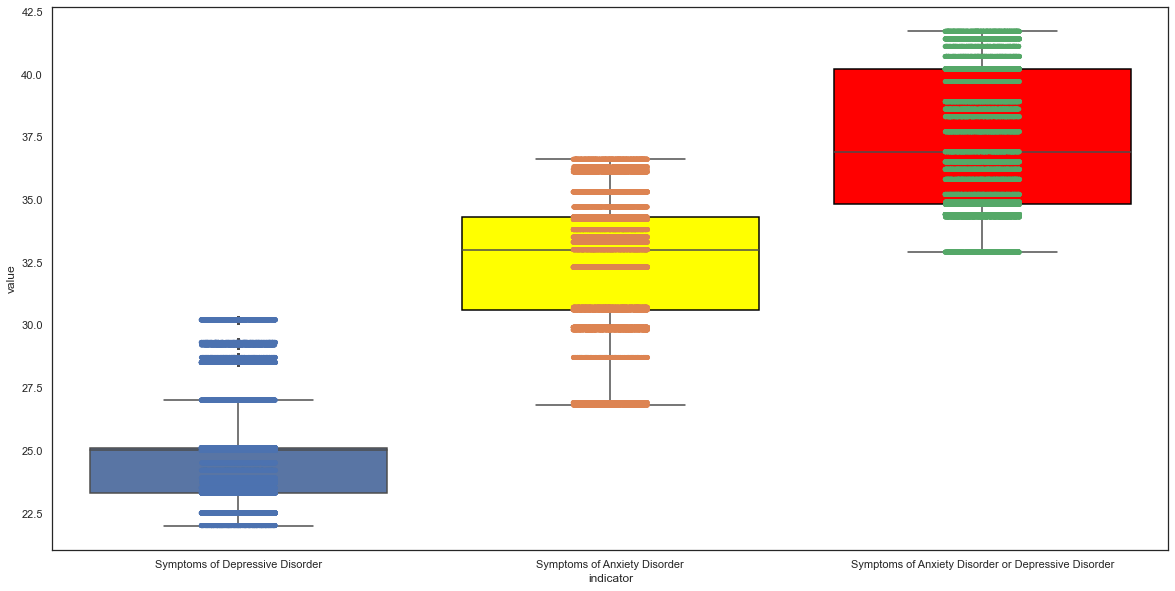

In [ ]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="indicator", y="value", data=data2)
ax= sns.stripplot(x="indicator", y="value", data=data2, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

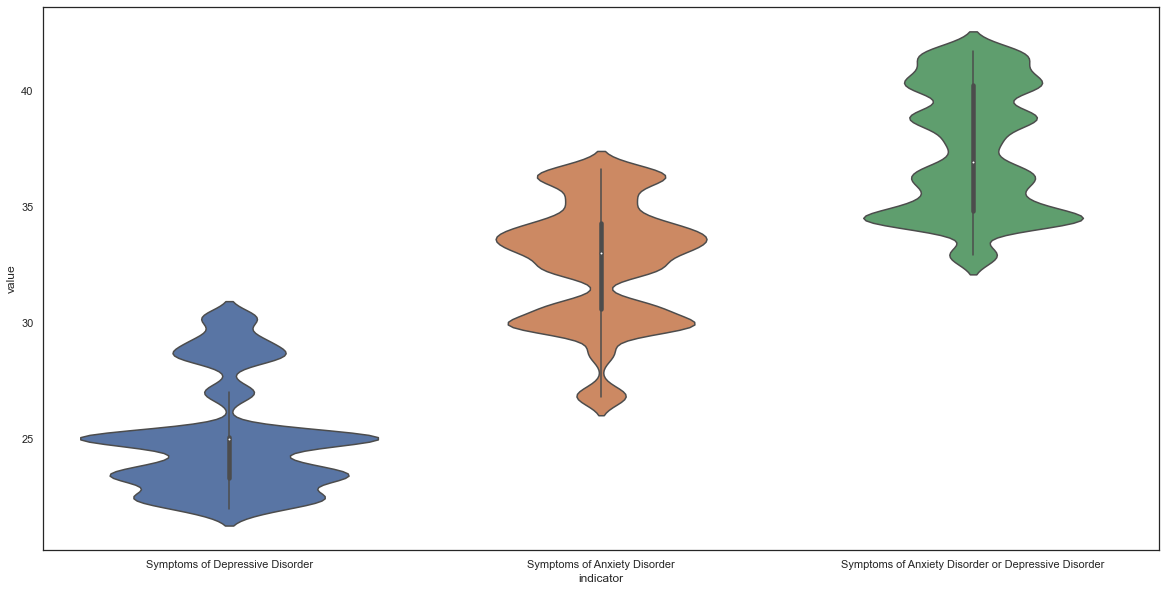

In [ ]:
# A violin plot shows the density of the data, simularly to a scatter plot,
#and presents catagorical data like a box plot.
# Denser regions of the data are fatter.
sns.violinplot(x="indicator", y="value", data=data2, size=6)
plt.show()

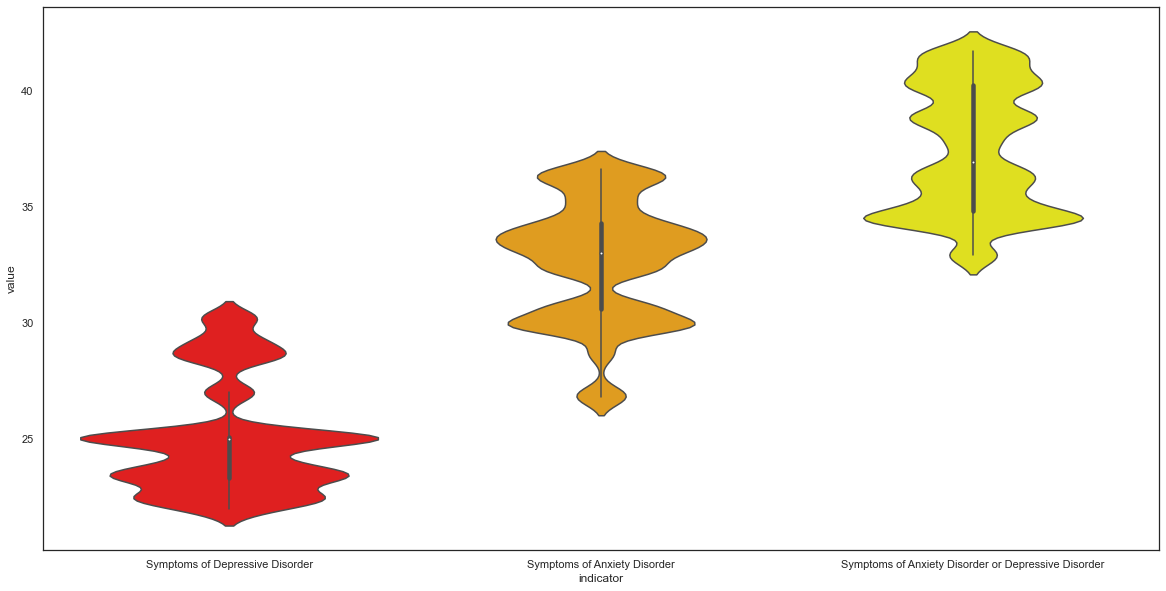

In [ ]:
sns.violinplot(x="indicator", y="value",  palette={"blue","red","yellow", "Green", "Orange"}, data=data2, size=6)
plt.show()

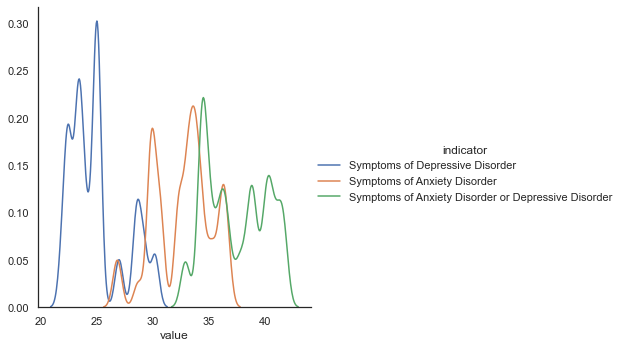

In [ ]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(data2, hue="indicator", size=5) \
   .map(sns.kdeplot, "value") \
   .add_legend()
plt.show()

In [ ]:
data2

indicator  phase  time_period  \
0                        Symptoms of Depressive Disorder    1.0          1.0   
1                        Symptoms of Depressive Disorder    1.0          1.0   
2                        Symptoms of Depressive Disorder    1.0          1.0   
3                        Symptoms of Depressive Disorder    1.0          1.0   
4                        Symptoms of Depressive Disorder    1.0          1.0   
...                                                  ...    ...          ...   
35779  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35780  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35781  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35782  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35783  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   

        time_period_start_date     time_period_end_date  value  lowci  highci  \
0      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
1      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
2      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
3      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
4      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
...                        ...                      ...    ...    ...     ...   
35779  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35780  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35781  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35782  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35783  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   

                      age  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  \
0           18 - 29 years     171.46              13.55        0.23   
1           18 - 29 years    1554.45             153.69       12.88   
2           18 - 29 years    2529.03             630.34      113.37   
3           18 - 29 years    2552.64            1192.50      364.17   
4           18 - 29 years    2976.74            1830.07      909.18   
...                   ...        ...                ...         ...   
35779  80 years and above   20207.72            1160.60       67.68   
35780  80 years and above   15941.19            2540.10      476.51   
35781  80 years and above    7067.11            2418.35      756.82   
35782  80 years and above    7477.43            3995.12     1989.81   
35783  80 years and above    6302.86             958.30      266.66   

             date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  
0      2020-04-23   90629.21686        19942.175032   6754.809134  
1      2020-04-23   90629.21686        19942.175032   6754.809134  
2      2020-04-23   90629.21686        19942.175032   6754.809134  
3      2020-04-23   90629.21686        19942.175032   6754.809134  
4      2020-04-23   90629.21686        19942.175032   6754.809134  
...           ...           ...                 ...           ...  
35779  2021-02-01  224684.00000        13326.000000    794.000000  
35780  2021-02-01  161559.00000        25652.000000   4800.000000  
35781  2021-02-01   50798.00000        17383.000000   5440.000000  
35782  2021-02-01   41994.00000        22437.000000  11175.000000  
35783  2021-02-01  525458.00000        79892.000000  22231.000000  

[35784 rows x 16 columns]

<Figure size 2160x2160 with 0 Axes>

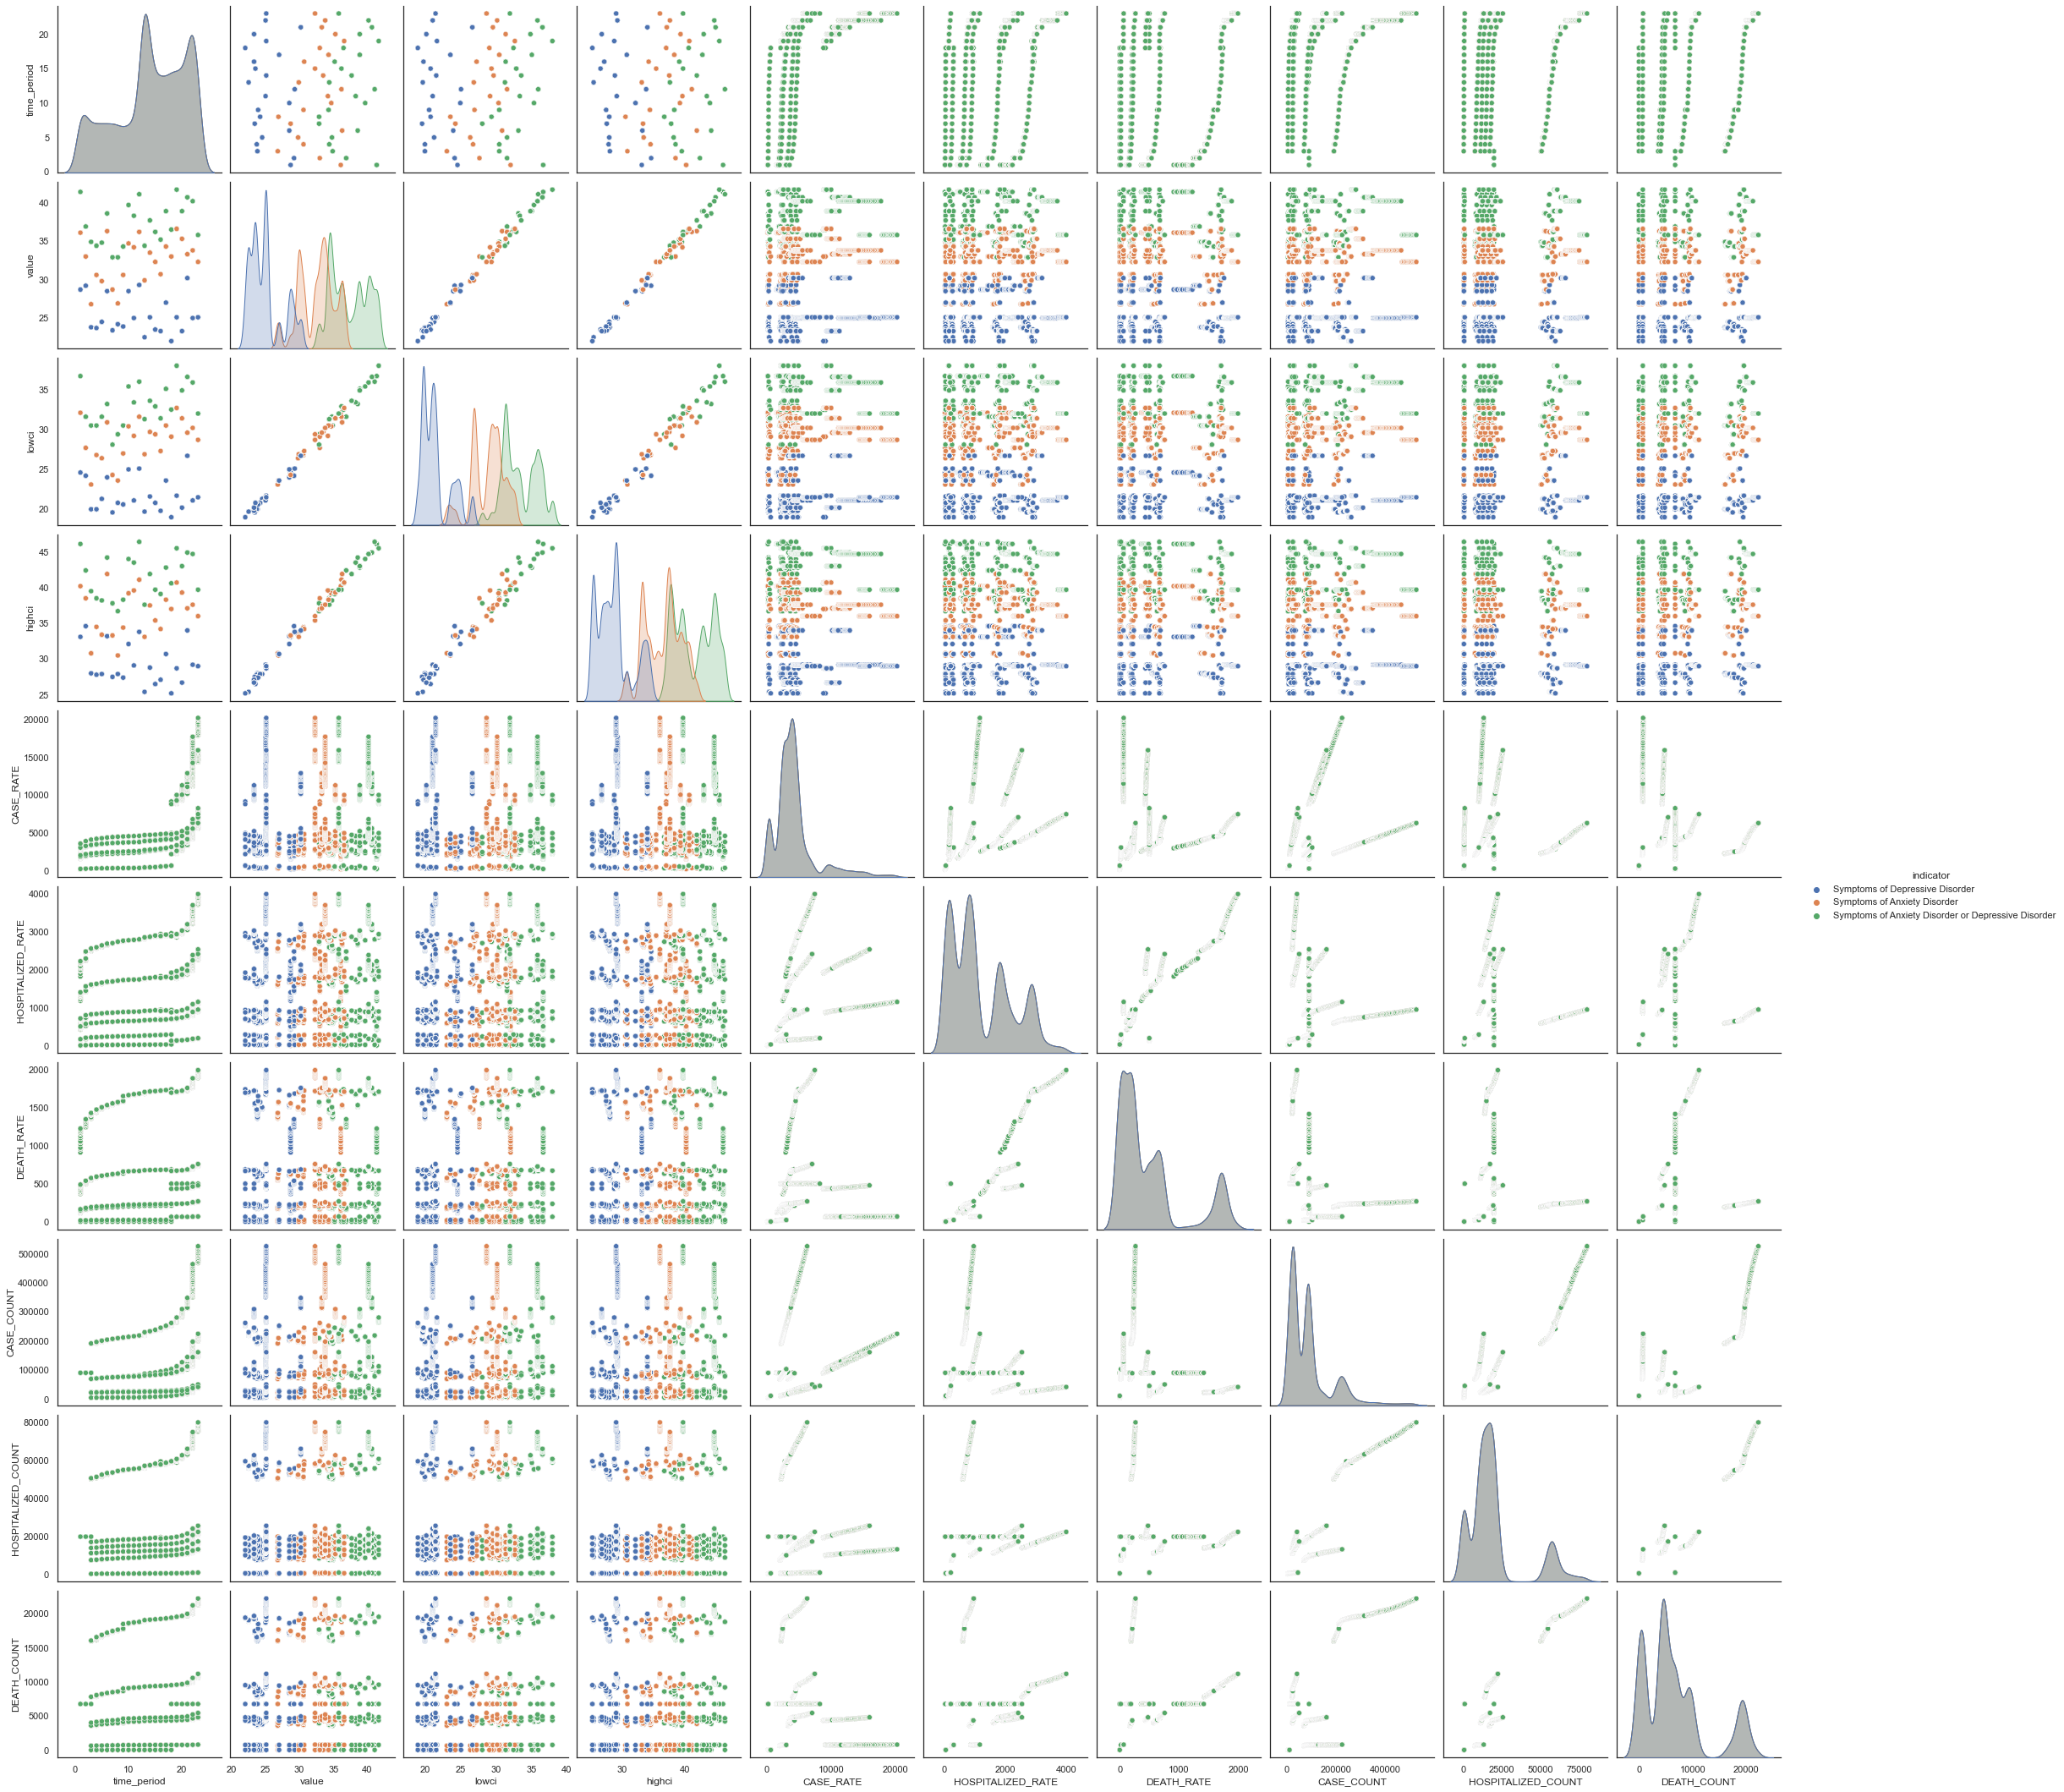

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(data2.drop("phase", axis=1), hue="indicator", size=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

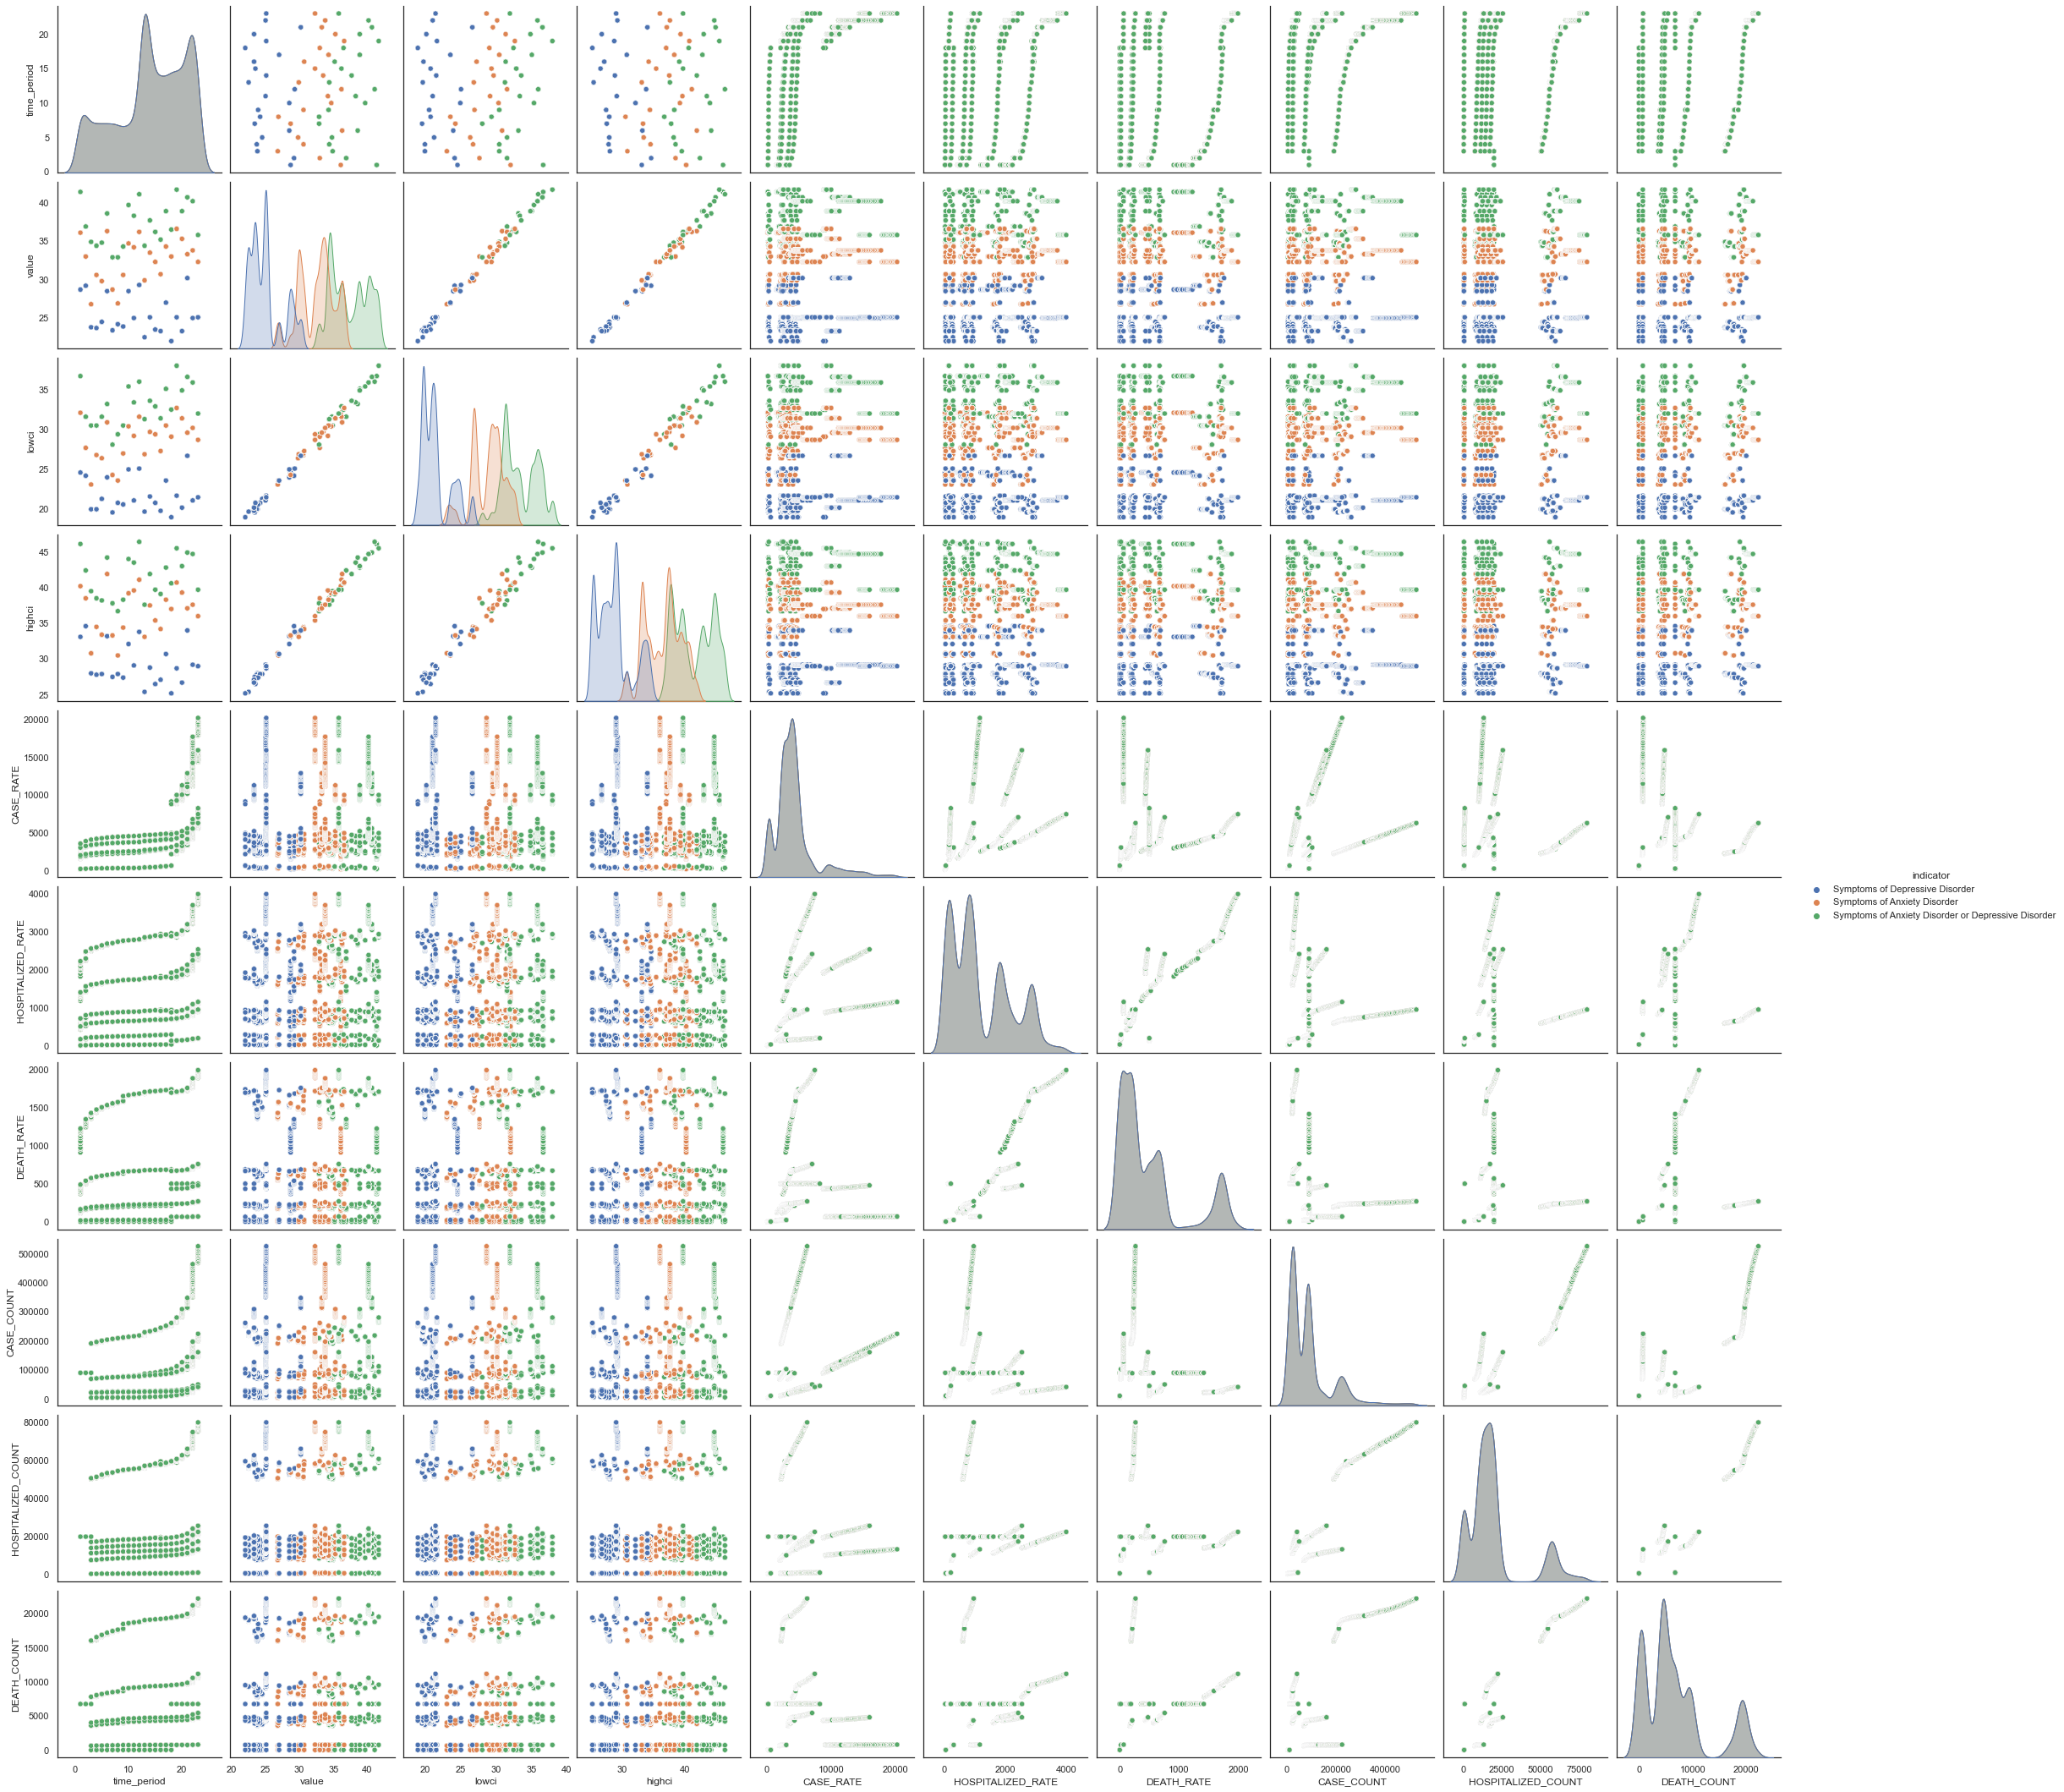

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data2.drop("phase", axis=1), hue="indicator", size=3, diag_kind="kde")
plt.show()

In [ ]:
"""# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.

#MIGHT NEED TO NORMALIZE HERE
data2["indicator"] = data2['indicator'].astype(float)
data2["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)
data2["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)
data2["age"] = data2['age'].astype(float)
data2["indicator"] = data2['indicator'].astype(float)

def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

data2 = min_max_normalization(data2)

sns.jointplot(x="value", y="twitter_count", data=data2, size=10,ratio=10, kind='hex',color='green')
plt.show()"""

'# Use seaborn\'s jointplot to make a hexagonal bin plot\n#Set desired size and ratio and choose a color.\n\n#MIGHT NEED TO NORMALIZE HERE\ndata2["indicator"] = data2[\'indicator\'].astype(float)\ndata2["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)\ndata2["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)\ndata2["age"] = data2[\'age\'].astype(float)\ndata2["indicator"] = data2[\'indicator\'].astype(float)\n\ndef min_max_normalization(df):\n    # copy the dataframe\n    df_norm = df.copy()\n    # apply min-max scaling\n    for column in df_norm.columns:\n        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())\n        \n    return df_norm\n\ndata2 = min_max_normal

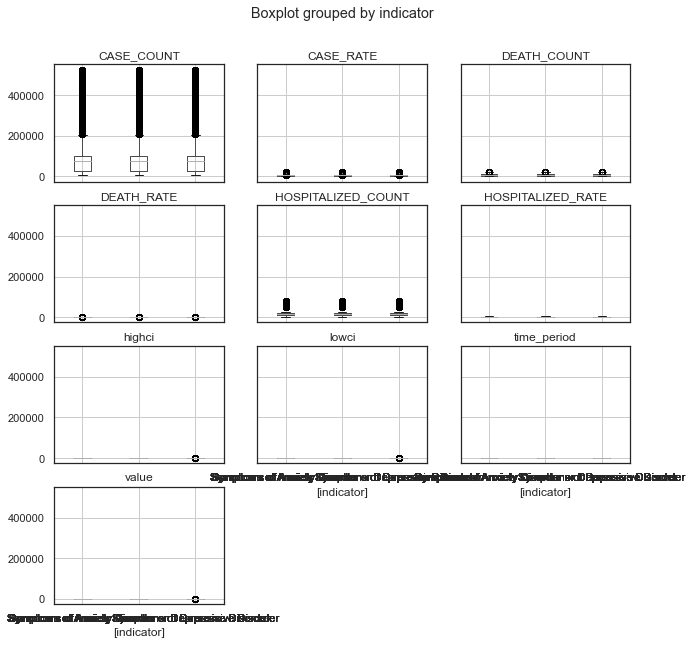

In [ ]:
# To make a Pandas boxplot grouped by species, use .boxplot
#Modify the figsize, by placing a value in the X and Y cordinates
data2.drop("phase", axis=1).boxplot(by="indicator", figsize=(10, 10))
plt.show()

In [ ]:
# In order to ignore FutureWarning
#!pip install tensorflow
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_104 (Dense)            (None, 3)                 27        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_106 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_107 (Dense)            (None, 3)                 27        
Total params: 171
Trainable params: 171
Non-tr

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 #Original Batch Size was 5. Need to change to a bigger value
                                 batch_size=256,
                                 epochs=68,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.32026487557792094
Test accuracy: 0.852645305514158
Model name: model_2
Test loss: 0.289569603681742
Test accuracy: 0.8781669150521609
Model name: model_3
Test loss: 0.2479037769949383
Test accuracy: 0.8866430700447094


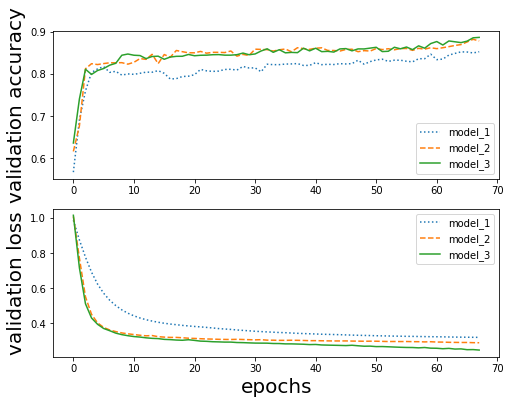

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    if(model_name in "model_1"):
        ax1.plot(val_acc, label=model_name, linestyle='dotted')
        ax2.plot(val_loss, label=model_name, linestyle='dotted')
    if(model_name in "model_2"):
        ax1.plot(val_acc, label=model_name, linestyle='dashed')
        ax2.plot(val_loss, label=model_name, linestyle='dashed')
    if(model_name in "model_3"):
        ax1.plot(val_acc, label=model_name, linestyle='solid')
        ax2.plot(val_loss, label=model_name, linestyle='solid')
    
ax1.set_ylabel('validation accuracy', fontsize=20)
ax2.set_ylabel('validation loss', fontsize=20)
ax2.set_xlabel('epochs', fontsize=20)
ax1.legend()
ax2.legend()
plt.show()

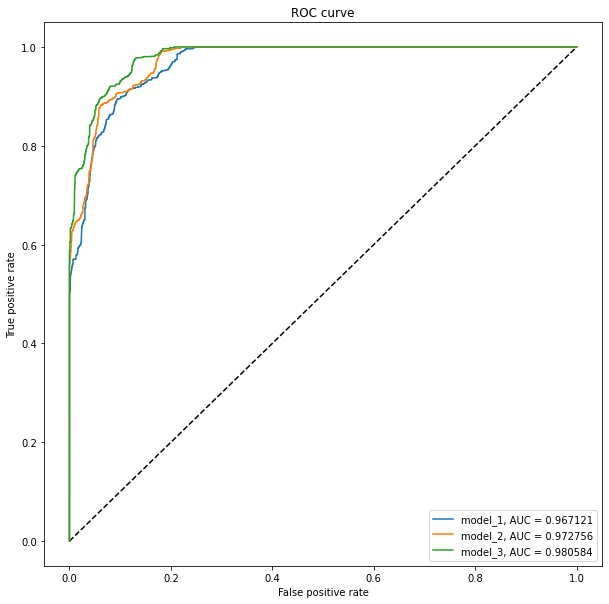

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=68, batch_size=256, verbose=0)
scores = cross_val_score(estimator, X_train, Y_train, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.88 (+/- 0.02)


In [ ]:
checker = create_model()

In [ ]:
checker.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_162 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_163 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_164 (Dense)            (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_test

0         1         2         3         4         5         6  \
19462  0.636364  0.076142  0.229340  0.724481  0.861820  0.040506  0.194121   
10403  0.500000  0.969543  0.120296  0.162652  0.111999  0.407026  0.693416   
17825  0.590909  0.157360  0.130281  0.168321  0.114331  0.439308  0.717275   
20194  0.681818  0.670051  0.230563  0.734354  0.862921  0.040763  0.196826   
34324  1.000000  0.700508  0.338235  0.945574  0.958207  0.065389  0.261672   
...         ...       ...       ...       ...       ...       ...       ...   
17009  0.590909  0.796954  0.129067  0.167771  0.114069  0.435385  0.714960   
27670  0.863636  0.065990  0.245882  0.747730  0.861282  0.045423  0.206000   
17070  0.590909  0.583756  0.013615  0.005774  0.000231  0.005153  0.002580   
28931  0.909091  0.416244  0.181473  0.187609  0.118678  0.600294  0.792515   
1709   0.045455  0.756345  0.094419  0.127206  0.083294  0.164543  0.245592   

              7  
19462  0.421673  
10403  0.842626  
17825  0.860177  
20194  0.422213  
34324  0.481436  
...         ...  
17009  0.858197  
27670  0.432699  
17070  0.000090  
28931  0.886279  
1709   0.303533  

[10736 rows x 8 columns]

In [ ]:
#!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation;
import numpy
import tensorflow
tensorflow.keras.backend.set_floatx('float64')

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
#dataset = numpy.loadtxt('/Users/yadavn/ATsCombined.csv', delimiter=",")
# split into input (X) and output (rflow.keY) variables
# create model
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
ann = model.fit(X_train, Y_train, epochs=68, batch_size=256)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/68
98/98 [==============================] - 0s 3ms/step - loss: 1.0576 - accuracy: 0.4887
Epoch 2/68
98/98 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.6936
Epoch 3/68
98/98 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7879
Epoch 4/68
98/98 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8181
Epoch 5/68
98/98 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8180
Epoch 6/68
98/98 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8225
Epoch 7/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8282
Epoch 8/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8308
Epoch 9/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8356
Epoch 10/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8444
Epoch 11/68
98/98 [

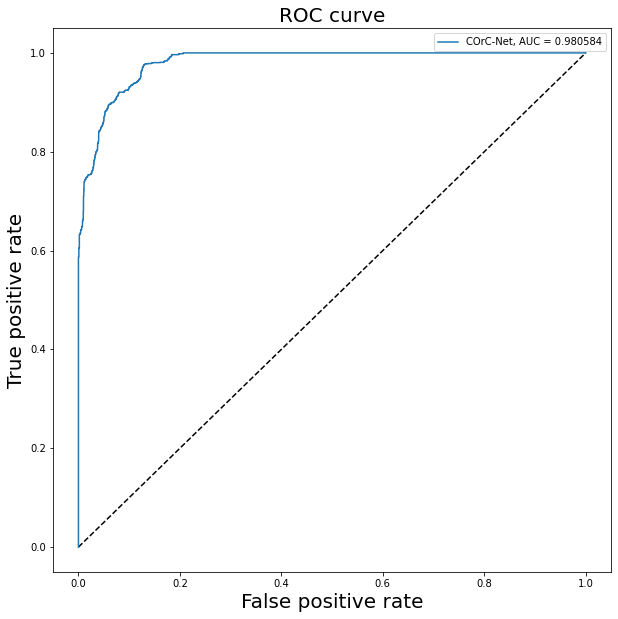

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format("COrC-Net", auc(fpr, tpr), fontsize=30))   
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.title('ROC curve', fontsize=20)
plt.legend();

In [ ]:
"""# define one new instance
Xnew = [[0.70, 0.75, 0.09, .75, .95, .155, .3, .25, .35, .66, .97]]
# make a prediction
# define one new instance
#Xnew = [[0.70, 1.75, 0.0, .25, .155, .155, 1, .25, .35, .66, .97, .88]]
# make a prediction showing all possible probabilities across the classses
ynew = checker.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
# Predict the final class
ynew = checker.predict_classes(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))"""

'# define one new instance\nXnew = [[0.70, 0.75, 0.09, .75, .95, .155, .3, .25, .35, .66, .97]]\n# make a prediction\n# define one new instance\n#Xnew = [[0.70, 1.75, 0.0, .25, .155, .155, 1, .25, .35, .66, .97, .88]]\n# make a prediction showing all possible probabilities across the classses\nynew = checker.predict(Xnew)\nprint("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))\n# Predict the final class\nynew = checker.predict_classes(Xnew)\nprint("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))'

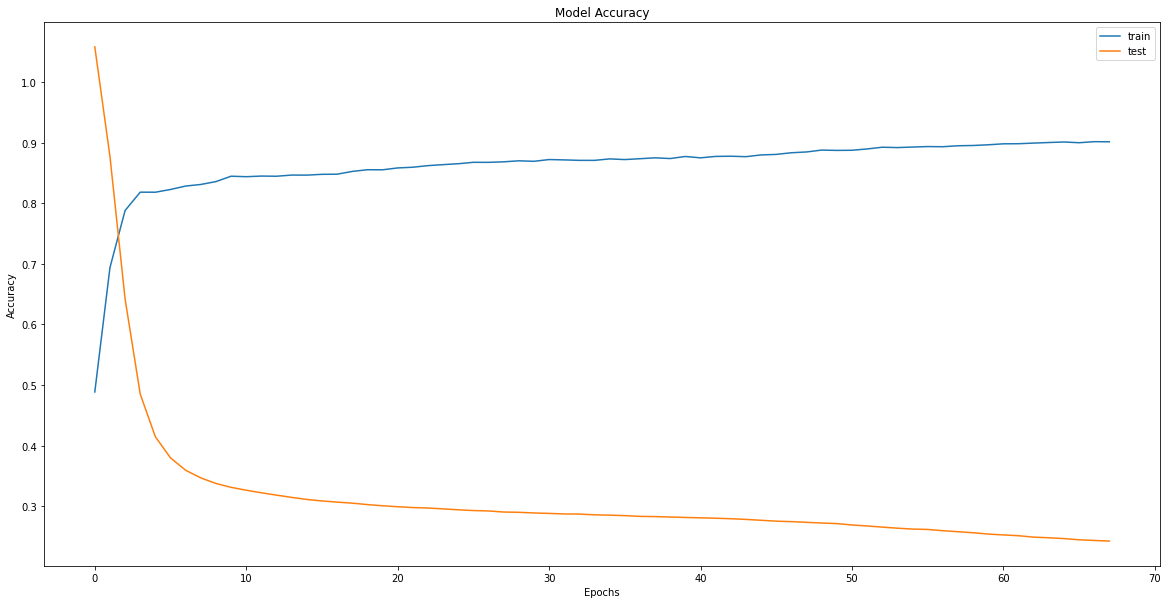

In [ ]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
import numpy as np
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
y_train_ad = np.argmax(Y_train, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      3580
           1       0.95      0.98      0.96      3571
           2       0.83      0.93      0.88      3585

   micro avg       0.89      0.89      0.89     10736
   macro avg       0.89      0.89      0.88     10736
weighted avg       0.89      0.89      0.88     10736
 samples avg       0.89      0.89      0.89     10736



In [ ]:
(Y_test == pred)

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test.argmax(axis=1), pred.round().argmax(axis=1))

array([[2687,  187,  706],
       [  87, 3484,    0],
       [ 237,    0, 3348]], dtype=int64)

In [ ]:
from scipy.stats import chi2_contingency

import numpy as np
from scipy.stats import ttest_ind

res = ttest_ind(Y_test, pred)

print(res)

Ttest_indResult(statistic=array([ 0.45898976, -0.36615281, -0.06047918]), pvalue=array([0.64624617, 0.71425466, 0.95177456]))
